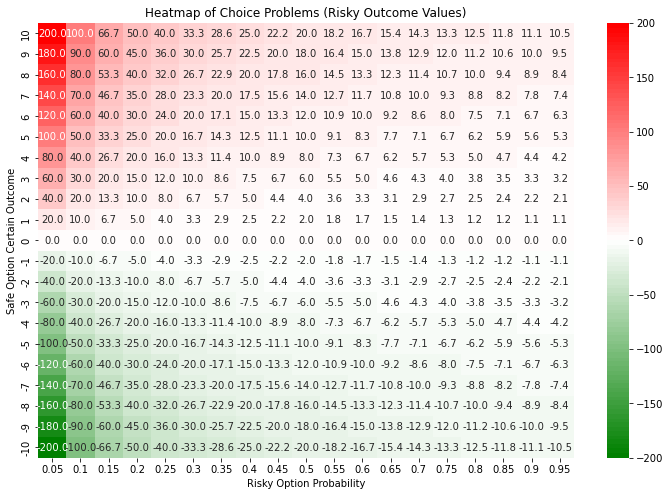

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from matplotlib.colors import LinearSegmentedColormap

# Define the ProbGenerator class to ensure equal EV for safe and risky outcomes
class ProbGenerator:
    def __init__(self) -> None:
        self.base = random.randrange(10, 20)
        self.lower_multiples = [1.1111, 1.25, 1.42857, 1.66667]
        self.higher_multiples = [2, 2.5, 3.3333, 4, 5, 10]

    def lowRisk(self, safe, prob):
        multiple = random.choice(self.lower_multiples)
        risky_value = round(self.base * multiple)
        # Adjust the risky value to ensure the EV equals the safe outcome
        risky_value_adjusted = safe / prob if prob != 0 else 0
        return {"base": self.base, 
                "risky": risky_value_adjusted,
                "risk_prob": prob}

    def highRisk(self, safe, prob):
        multiple = random.choice(self.higher_multiples)
        risky_value = round(self.base * multiple)
        # Adjust the risky value to ensure the EV equals the safe outcome
        risky_value_adjusted = safe / prob if prob != 0 else 0
        return {"base": self.base, 
                "risky": risky_value_adjusted,
                "risk_prob": prob}

# Initialize the ProbGenerator
prob_gen = ProbGenerator()

# Define the range for safe outcomes and given probabilities
safe_outcomes = np.arange(10, -11, -1)  # Flipped range from 10 to -10

probabilities = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
                 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]

# Create DataFrames to hold the risky outcomes and expected values
data_risky = np.zeros((len(safe_outcomes), len(probabilities)))
data_ev = np.zeros((len(safe_outcomes), len(probabilities)))

# Populate the DataFrames
for i, safe in enumerate(safe_outcomes):
    for j, prob in enumerate(probabilities):
        if prob <= 0.50:
            outcome = prob_gen.lowRisk(safe, prob)
        else:
            outcome = prob_gen.highRisk(safe, prob)
        
        risky_value = outcome['risky']
        data_risky[i, j] = risky_value
        data_ev[i, j] = prob * risky_value

df_risky = pd.DataFrame(data_risky, index=safe_outcomes, columns=np.round(probabilities, 2))
df_ev = pd.DataFrame(data_ev, index=safe_outcomes, columns=np.round(probabilities, 2))

# Create a custom diverging colormap (green for safe, red for risky)
colors = ["green", "white", "red"]
n_bins = 100  # Discretize the colormap
cmap_name = 'custom_green_red'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the Risky Outcome Values Heatmap (Description)
plt.figure(figsize=(12, 8))
sns.heatmap(df_risky, cmap=cm, center=np.mean(data_risky), annot=True, fmt=".1f",
            xticklabels=probabilities, yticklabels=safe_outcomes)
plt.xlabel('Risky Option Probability')
plt.ylabel('Safe Option Certain Outcome')
plt.title('Heatmap of Choice Problems (Risky Outcome Values)')

plt.show()